In [1]:
#"I (We) certify that the code and data in this assignment were generated independently,
#using only the tools and resources defined in the course and that I (we) did not receive
#any external help, coaching or contributions during the production of this work.

In [82]:
#import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#drop all NaN values
df1 = pd.read_csv(r"datasets\winequality-red.csv")
data1 = pd.DataFrame(df1)
data1.isnull().sum(axis=0)
no_null_df1 = df1.dropna()

#Normalizing fixed acidity
fixed_acidity_length = df1["fixed acidity"]
min_fixed_acidity_length = fixed_acidity_length.min()
max_fixed_acidity_length = fixed_acidity_length.max()-min_fixed_acidity_length
fixed_acidity_norm = (fixed_acidity_length-np.ones(len(fixed_acidity_length))*min_fixed_acidity_length)/max_fixed_acidity_length

#Normalizing residual sugar
residual_sugar_length = df1["residual sugar"]
min_residual_sugar_length =  residual_sugar_length.min()
max_residual_sugar_length =  residual_sugar_length.max()-min_residual_sugar_length
residual_sugar_norm = (residual_sugar_length-np.ones(len(residual_sugar_length))*min_residual_sugar_length)/max_residual_sugar_length

#Normalizing free sulphur dioxide
fsd_length = df1["free sulfur dioxide"]
min_fsd_length = fsd_length.min()
max_fsd_length = fsd_length.max()-min_fsd_length
fsd_norm = (fsd_length-np.ones(len(fsd_length))*min_fsd_length)/max_fsd_length

#Normalizing total sulfur dioxide
tsd_length = df1["total sulfur dioxide"]
min_tsd_length = tsd_length.min()
max_tsd_length = tsd_length.max()-min_tsd_length
tsd_norm = (tsd_length-np.ones(len(tsd_length))*min_tsd_length)/max_tsd_length

#Normalizing pH
pH_length = df1["pH"]
min_pH_length = pH_length.min()
max_pH_length = pH_length.max()-min_pH_length
pH_norm = (pH_length-np.ones(len(pH_length))*min_pH_length)/max_pH_length

#Normalizing alcohol
alcohol_length = df1["alcohol"]
min_alcohol_length = alcohol_length.min()
max_alcohol_length = alcohol_length.max()-min_alcohol_length
alcohol_norm = (alcohol_length-np.ones(len(alcohol_length))*min_alcohol_length)/max_alcohol_length

#Normalizing quality
quality_length = df1["quality"]
min_quality_length = quality_length.min()
max_quality_length = quality_length.max()-min_quality_length
quality_norm = (quality_length-np.ones(len(quality_length))*min_quality_length)/max_quality_length

In [84]:
#Set up training and test data
df_winequality = df1.drop(columns = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol', 'quality'])
df_winequality_final = pd.concat([df_winequality, fixed_acidity_norm, residual_sugar_norm, fsd_norm, tsd_norm, pH_norm, alcohol_norm, quality_norm], axis = 1)
X_source1 = df_winequality_final.drop(columns = ['alcohol'])
X_source1.insert(loc=0, column='ones',value=1) #Insert ones column for X0 in correlation with w0 bias
y_source1 = df_winequality_final["alcohol"].to_frame()
len_80_percent_winequality = round(len(y_source1)*80/100)
X_train1 = X_source1.head(len_80_percent_winequality)
y_train1 = y_source1.head(len_80_percent_winequality)
#Capture testing values (20% of data set - testing)
X_test1 = X_source1.tail(len(y_source1)-len_80_percent_winequality)
X_test1 = X_test1.reset_index(drop=True) #reset indexing to start at 0
y_test1 = y_source1.tail(len(y_source1)-len_80_percent_winequality)
y_test1 = y_test1.reset_index(drop=True) #reset indexing to start at 0
#Converting X training dataset into an array
X1 = X_train1.to_numpy()
#Converting X training dataset into an array
y1 = y_train1.to_numpy()

In [136]:
class GradRegression:
  def __init__(self, learning_rate, iteration_qty):
    self.learning_rate = learning_rate
    self.iteration_qty = iteration_qty

  def predict_val(self, w_pred, x_pred):
    dot_prod = 0
    for i in range(len(x_pred)):
      dot_prod = dot_prod + w_pred[i]*x_pred[i]
    return dot_prod.item()

  def delta(self, w_delta, x_delta, y_train_delta):
    delt = y_train_delta - self.predict_val(w_delta, x_delta)
    return delt.item()

  def der(self, w_der, x_der, y_train_der, k):
  # Derivative of loss w.r.t. weights
    n = len(y_train_der)
    l = len(X_train1.columns)
    diff = np.zeros(l)
    d = 0
    for j in range(n):
      delt = self.delta(w_der, x_der.iloc[j], y_train_der.iloc[j])
      self.loss.iloc[k] = self.loss.iloc[k]+delt
      delta = x_der.iloc[j]*delt
      diff = diff-delta
    self.loss.iloc[k] = abs(self.loss.iloc[k]/n)
    return diff*2/n

  def fit(self,x_fit,y_train_fit):
    w_initial = {'ones':  0, 'volatile acidity':  np.random.uniform(0, 1), 'citric acid':  np.random.uniform(0, 1), 'chlorides':  np.random.uniform(0, 1), 'density':  np.random.uniform(0, 1), 'sulphates':  np.random.uniform(0, 1), 'fixed acidity':  np.random.uniform(0, 1), 'residual sugar':  np.random.uniform(0, 1), 'free sulfur dioxide':  np.random.uniform(0, 1), 'total sulfur dioxide':  np.random.uniform(0, 1), 'pH':  np.random.uniform(0, 1), 'quality':  np.random.uniform(0, 1)}
    w = pd.Series(data=w_initial, index=['ones', 'volatile acidity', 'citric acid','chlorides','density','sulphates', 'fixed acidity', 'residual sugar','free sulfur dioxide','total sulfur dioxide','pH','quality'])
    self.loss = pd.DataFrame(np.zeros(self.iteration_qty), columns = ['loss'])
    for k in range(self.iteration_qty):
      der = self.der(w, x_fit, y_train_fit, k)
      w = w - self.learning_rate*der#update weight
    self.w = w
    return w
  # Takes as an input hyperparameters: learning rate and the number of iterations.

In [139]:
learning_rate = 1e-2
iterations = 100
model = GradRegression(learning_rate,iterations)
model.fit(X_test1,y_test1)

ones                   -0.561052
volatile acidity        0.429944
citric acid             0.314394
chlorides               0.273530
density                 0.076994
sulphates              -0.150799
fixed acidity           0.805846
residual sugar          0.326065
free sulfur dioxide     0.728920
total sulfur dioxide    0.019957
pH                      0.299420
quality                 0.068562
dtype: float64

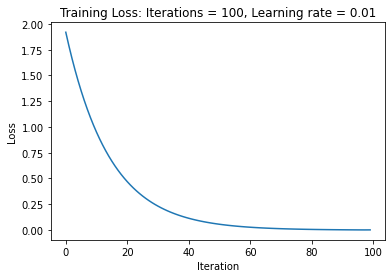

In [140]:
plt.plot(model.loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.title('Training Loss: Iterations = {}, Learning rate = {}'.format(iterations,learning_rate))
plt.show()